# Задание

Цель: изучить применение дерева решений в рамках задачи регрессии

Описание задания:

В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets.
Скачать датасет также можно по ссылке
Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

Этапы работы:
1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

2. Проведите первичный анализ.
    - a.Проверьте данные на пропуски. Удалите в случае обнаружения.
    - b.*Нормализуйте один из признаков.

3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

4. Обучите модель регрессии на обучающем множестве.

5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

6. Обучите дерево решений на обучающем множестве.
    - a. Повторите п. 5 для полученной модели.
    - b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
     -a. Повторите п. 5 для полученной модели.

8. Сформулируйте выводы по проделанной работе.
    - a. Сравните точность двух моделей.
    - b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?
    
Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений.

# 1. Получите данные и загрузите их в рабочую среду.

In [150]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import preprocessing

In [151]:
df = fetch_california_housing(as_frame=True)["frame"]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# 2. Проведите первичный анализ.

## a.Проверьте данные на пропуски. Удалите в случае обнаружения.

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## b.*Нормализуйте один из признаков.

In [153]:
# min_value = df["Population"].min()
# max_value = df["Population"].max()

# df["Population"] = (df["Population"] - min_value) / (max_value - min_value)
# df.head()

# 3. Разделите выборку на обучающее и тестовое подмножества.

In [154]:
X = df.drop(["MedHouseVal"], axis=1)
y = df["MedHouseVal"]

In [155]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Обучите модель регрессии на обучающем множестве.

In [156]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

# 5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели.

In [157]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.6125511913966952, 0.575787706032451)

# 6. Обучите дерево решений на обучающем множестве.

In [158]:
reg = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

## a. Повторите п. 5 для полученной модели.


In [159]:
reg.score(X_train, y_train), reg.score(X_test, y_test)

(1.0, 0.6186632145457622)

## b. Визуализируйте часть дерева решений.

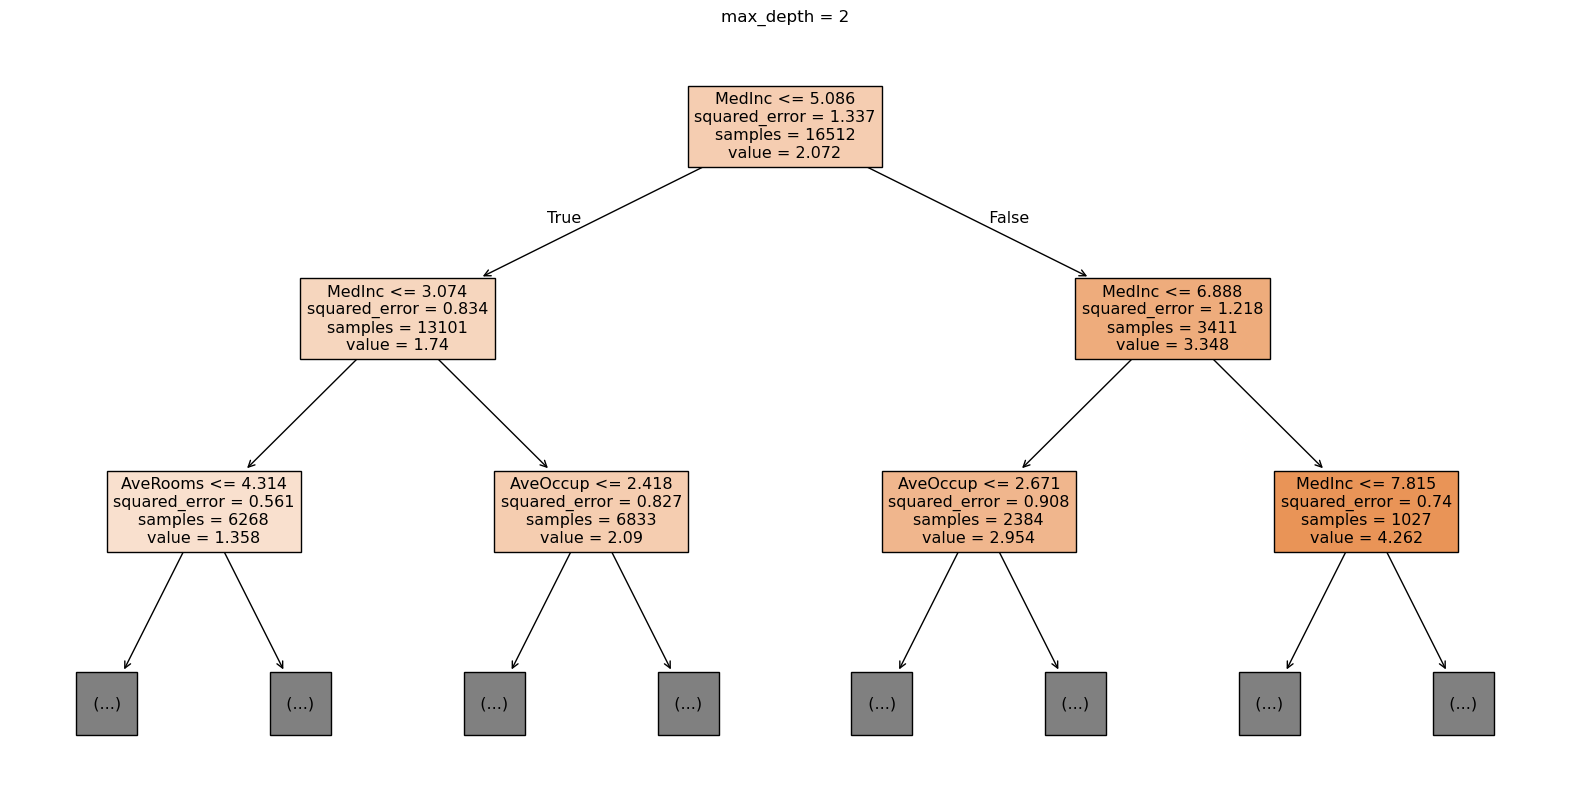

In [ ]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(reg, feature_names=df.columns, filled=True, max_depth=2)
plt.show()


In [161]:
reg.score(X_train, y_train), reg.score(X_test, y_test)

(1.0, 0.6186632145457622)

# 7. Оптимизируйте глубину дерева (max_depth).

##  max_depth = 3 и далее графики не читабельны, приведем метрики

In [ ]:
reg = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
reg.get_depth()

34 - максимальная глубина дерева при min_samples_leaf=1

In [162]:
list_depth = [i for i in range(1, 35)]

# Результирующий датафрейма
df_score = pd.DataFrame(
    columns=[
        "max_depth",
        "score_train",
        "score_test",
    ]
)

for depth in list_depth:
    reg = DecisionTreeRegressor(max_depth=depth, random_state=42).fit(X_train, y_train)
    df_score.loc[len(df_score)] = {
        "max_depth": depth,
        "score_train": reg.score(X_train, y_train),
        "score_test": reg.score(X_test, y_test),
    }
df_score

,max_depth,score_train,score_test
0,1,0.316997,0.279511
1,2,0.452045,0.424406
2,3,0.537898,0.509763
3,4,0.588659,0.554029
4,5,0.637679,0.599732
5,6,0.678245,0.620513
6,7,0.716698,0.651570
7,8,0.760173,0.677928
8,9,0.799926,0.683253
9,10,0.834778,0.682948


При max_depth > 9 начинается значительное переобучение

## *Оптимизируйте ещё один параметр модели на выбор.

**min_samples_leaf** - я выбираю тебя!

далее брутфорс, так не надо, но мы пока не проходили GridSearchCV

In [164]:
df_score_cor = pd.DataFrame(
    columns=[
        "max_depth",
        "leaf",
        "score_train",
        "score_test",
    ]
)
for depth in list_depth:
    for leaf in [i for i in range(1, 51)]:
        reg = DecisionTreeRegressor(
            max_depth=depth, min_samples_leaf=int(leaf), random_state=42
        ).fit(X_train, y_train)
        df_score_cor.loc[len(df_score_cor)] = {
            "max_depth": depth,
            "leaf": leaf,
            "score_train": reg.score(X_train, y_train),
            "score_test": reg.score(X_test, y_test),
        }

In [165]:
df_score_cor.sort_values(by="score_test", ascending=False)

,max_depth,leaf,score_train,score_test
765,16,16,0.824045,0.730217
815,17,16,0.824083,0.730185
865,18,16,0.824092,0.730174
1365,28,16,0.824092,0.730174
1415,29,16,0.824092,0.730174
...,...,...,...,...
31,1,32,0.316997,0.279511
30,1,31,0.316997,0.279511
29,1,30,0.316997,0.279511
28,1,29,0.316997,0.279511


# 8. Вывод

## a. Сравните точность двух моделей.

1. Результат **LR**:
- Без обработки данных - **0.61, 0.57**

2. Результат **DTR**:
- Без обработки данных - **1.0, 0.618**
- Результат получен при максимальной глубине (34) и минимальном кол-ве элементов дочерних узлов (1)
- Модель переобучилась и требуется подбор параметров.

3. Оптимизация параметров:

**Max_depth:**
- При max_depth 9 метрика - **0.79, 0.68**
- При переборе max_depth наблюдается переобучение при значении > 9

**min_samples_leaf**:
- При переборе min_samples_leaf и max_depth наблюдается схождение в точке max_depth и leaf = 16.
- Метрика улучшается до - **0.82, 0.73**